In [ ]:
from sklearn.datasets import load_digits
dic=load_digits()
print(dic.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [ ]:
dic['data']

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
dic['data'].shape

(1797, 64)

In [ ]:
arr=dic['data'][2]
print(arr)

[ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
  8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
 15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
  5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]


<Figure size 432x288 with 0 Axes>

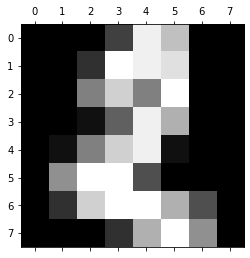

In [ ]:
arr1=arr.reshape(8,8)
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(arr1)

In [ ]:
import pandas as pd
df=pd.DataFrame(dic['data'],columns=dic['feature_names'])

In [ ]:
X=df
y=dic['target']

In [ ]:
from sklearn.preprocessing import StandardScaler 
model1=StandardScaler()
X_scaled=model1.fit_transform(X)
print(X_scaled)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(0.95)
X_pca=pca.fit_transform(X)
print("After Applying PCA, Shape is",X_pca.shape)
print('----------------------------------')
print('Previous Shape was',X.shape)

After Applying PCA, Shape is (1797, 29)
----------------------------------
Previous Shape was (1797, 64)


In [ ]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [ ]:
pca.n_components_

29

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=9)
logistic=LogisticRegression()
logistic.fit(X_train,y_train)
print(logistic.score(X_test,y_test))

0.9611111111111111


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
X_train_pca,X_test_pca,y_train_pca,y_test_pca=train_test_split(X_pca,y,test_size=0.2,random_state=9)
logistic1=LogisticRegression()
logistic1.fit(X_train_pca,y_train_pca)
print(logistic1.score(X_test_pca,y_test_pca))

# **Dimension Reduction by no of components or columns or features**

In [ ]:
pca1=PCA(n_components=2)
X_pca1=pca1.fit_transform(X)
print(X_pca1.shape)


(1797, 2)


In [ ]:
print(X_pca1)
print('---------------------------------------')
print(pca1.explained_variance_ratio_)

[[ -1.25947007  21.27488505]
 [  7.9576037  -20.76869559]
 [  6.99193073  -9.95598926]
 ...
 [ 10.80128392  -6.96025066]
 [ -4.87210468  12.42395826]
 [ -0.34438193   6.36554646]]
---------------------------------------
[0.14890594 0.13618771]


In [ ]:
X_train_pca1,X_test_pca1,y_train_pca1,y_test_pca1=train_test_split(X_pca1,y,test_size=0.2,random_state=9)
logistic2=LogisticRegression()
logistic2.fit(X_train_pca1,y_train_pca1)
print(logistic2.score(X_test_pca1,y_test_pca1))

0.5861111111111111


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
